In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/eshwarprasadS/CVAssignmentDataset/main/CVAssignmentDataset.csv"

In [3]:
dataset = pd.read_csv(url)
# dataset.head()
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
dataset

,Class,Text
0,0,"RT @MorningBriefing: ""In order to fix the VA, ..."
1,0,Today I introduced #ItsAboutTimeAct to increas...
2,1,"During #SmallBusinessWeek, I shared some the w..."
3,1,Yet another court has struck down @realDonaldT...
4,0,"As we come to the end of #WomensHistoryMonth, ..."
...,...,...
86456,1,Virginia insurers directly blamed Trump/GOP sa...
86457,0,Deeply saddened by the events unfolding in Las...
86458,0,"Once again this year, I am partnering w. WPDA ..."
86459,1,The ERA isn't just about equal pay for equal w...


**Fuction to plot the metrics from the model class**

In [34]:
def plot_metrics(name,plot_title):
  ax = plt.axes()
  ax.set_facecolor('silver')
  plt.plot(history.history[name],label=name)
  plt.plot(history.history["val_"+name],label="val_"+name)
  plt.title(plot_title)
  plt.xlabel("epochs")
  plt.ylabel("binary_CE values")
  plt.grid()
  plt.legend()
  plt.show()

**Data Preprocessing and deletion the class which isnt from 0 or 1**

In [5]:
def get_data(url):
  dataset = pd.read_csv(url)
  dataset = dataset.dropna(axis=0)
  print("Number of different Classes")
  print("===============================")
  print(dataset.groupby("Class")["Text"].value_counts())
  print("===============================")
  dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
  labels = dataset.iloc[:,0].values
  labels = labels.astype(np.int32)
  data = dataset.iloc[:,-1].values
  data = data.astype(str)
  return labels,data

**WHile analysing the data, the data after https or hyperlink is redundant and it will take spaces in vocab size unnecesary to avoid it we created a fucntion which will delete the backend**

In [6]:
def delete_backend(data):
  sentences = []
  for i in data:
    x = re.split("http",i)
    sentences.append(x[0])
  return sentences

In [7]:
def splitting(labels,data,split_point=0.8):
  split_value = int(len(labels)*split_point)
  train_data = data[:split_value]
  test_data = data[split_value:]
  train_label = labels[:split_value]
  test_label = labels[split_value:]
  return train_data,train_label,test_data,test_label

In [8]:
labels,data = get_data(url)
data = np.array(delete_backend(data))
train_data,train_label,test_data,test_label = splitting(labels,data)

Number of different Classes
Class  Text                                                                                                                                            
0      RT @SpeakerRyan: Today, the @USCapitol flags are lowered to half-staff in honor of our country’s law enforcement who have given their lives…        17
       RT @RepDianeBlack: ICYMI: 107 of my colleagues joined my letter to @SpeakerRyan, @GOPLeader &amp; @SteveScalise urging them to do everything in…    13
       RT @NatResources: .@Interior is celebrating National Park Week with free entrance to all national parks on Saturday, April 21! #FindYourPar…        12
       RT @HouseGOP: The flags of the @USCapitol are lowered to half-staff to honor the courageous men &amp; women of America's law enforcement who ga…    10
       RT @realDonaldTrump: On behalf of the American people, WELCOME HOME! https://t.co/hISaCI95CB                                                        10
                              

In [9]:
len(train_data),len(test_data),len(train_label),len(test_label),type(train_data),type(train_label),train_data.shape,train_label.shape

(69168, 17292, 69168, 17292, numpy.ndarray, numpy.ndarray, (69168,), (69168,))

# Setting up Hyperparmaters 

In [10]:
vocab_size = 10000        #These 3 are predefined in the tast
activation="relu"         #These 3 are predefined in the tast
max_words = 50            #These 3 are predefined in the tast


oov_token = "<oov>"       #these are out of vocabulary tokens 
truncate = "post"         #from where you want to truncate from start(pre) or last(post) according to max length
padding = "post"          # adds padding to the end
number_of_epochs = 30

# Preprocessing the Data and tokenizing it

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
token = Tokenizer(num_words=vocab_size,oov_token=oov_token)
token.fit_on_texts(data)
word_index = token.word_index
print(word_index)

{'<oov>': 1, 'the': 2, 'to': 3, 'of': 4, 'and': 5, 'in': 6, 'a': 7, 'for': 8, 'rt': 9, 'on': 10, 'is': 11, 'i': 12, 'our': 13, 'with': 14, 'this': 15, 'we': 16, 'amp': 17, 'you': 18, 'my': 19, 'at': 20, 'that': 21, 'today': 22, 'are': 23, 'from': 24, 'will': 25, 'be': 26, 'have': 27, 'it': 28, 'as': 29, 'by': 30, 'about': 31, 'was': 32, 'great': 33, 'all': 34, 'their': 35, 'who': 36, 'more': 37, 'an': 38, 'thank': 39, 'house': 40, 'has': 41, 'your': 42, '…': 43, 'tax': 44, 'bill': 45, 'day': 46, 'not': 47, 'new': 48, 'act': 49, 'his': 50, 'time': 51, 'work': 52, 'us': 53, 'congress': 54, 'now': 55, 'thanks': 56, 'trump': 57, 'can': 58, 'people': 59, 'out': 60, 'week': 61, 'president': 62, 'up': 63, 'proud': 64, 'american': 65, 'last': 66, 'one': 67, 'students': 68, 'support': 69, 'they': 70, 'just': 71, 'happy': 72, 'me': 73, 'so': 74, 'here': 75, 'americans': 76, 'must': 77, 'how': 78, 'w': 79, 'what': 80, 'but': 81, 'first': 82, 'join': 83, 'national': 84, 'am': 85, 'see': 86, 'help'

Making sequences from the training and testing data

In [13]:
train_seq = token.texts_to_sequences(train_data)
train_pad_sequence = pad_sequences(train_seq,maxlen=max_words,padding="post",truncating=truncate)

#-----------------------------------------------
test_seq = token.texts_to_sequences(test_data)
test_pad_sequence = pad_sequences(test_seq,maxlen=max_words,padding="post",truncating=truncate)

Utility function just to decode our padded values

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(train_data[11])
print(decode_review(train_pad_sequence[11]))

RT @JesseLehrich: "In some cases, rental payments for some of the neediest families would triple" 
rt <oov> in some cases rental payments for some of the <oov> families would triple ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?


In [15]:
train_pad_sequence.shape,test_pad_sequence.shape

((69168, 50), (17292, 50))

# Building the model according to requirements

In [16]:
#since the model is quite simple we will use Sequentail API instead of Functional API

# **Using BatchNormalization because Loss is getting stuck. Its a little tweak and wouldnt hurt model accuracy but it will improve it.**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Conv1D,Dropout,LSTM,Bidirectional,MaxPool1D,Dense

In [18]:
#all the layers ar mentioned in the project so cant change the hyperparamters here like kernal size,vocab_size,activaiton
#model is as same as metionoed in the task

def define_model():
  model = Sequential()
  model.add(Embedding(vocab_size,output_dim=32,input_length=max_words,name="embedding_1"))
  model.add(Conv1D(filters=32, kernel_size=5, activation=activation,padding="causal",name="conv1D_1"))
  model.add(MaxPool1D(2,2,name="maxpooling1D_1"))
  model.add(Bidirectional(LSTM(256,return_sequences=True,activation="tanh"),name="bidirectional_1_lstm_1"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Dropout(0.8,name="dropout_1"))
  model.add(Bidirectional(LSTM(256,activation="tanh"),name="bidirectional_2_lstm_2"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Dropout(0.8,name="dropout_2"))
  model.add(Dense(1024,activation=activation,name="dense_1"))
  model.add(Dropout(0.8,name="dropout_3"))
  model.add(Dense(512,activation=activation,name="dense_2"))
  model.add(Dropout(0.8,name="dropout_4"))
  model.add(Dense(1,activation="sigmoid",name="dense_3"))


  print(model.summary())
  return model

In [19]:
my_model = define_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 32)            320000    
_________________________________________________________________
conv1D_1 (Conv1D)            (None, 50, 32)            5152      
_________________________________________________________________
maxpooling1D_1 (MaxPooling1D (None, 25, 32)            0         
_________________________________________________________________
bidirectional_1_lstm_1 (Bidi (None, 25, 512)           591872    
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 512)           2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 512)           0         
_________________________________________________________________
bidirectional_2_lstm_2 (Bidi (None, 512)               1

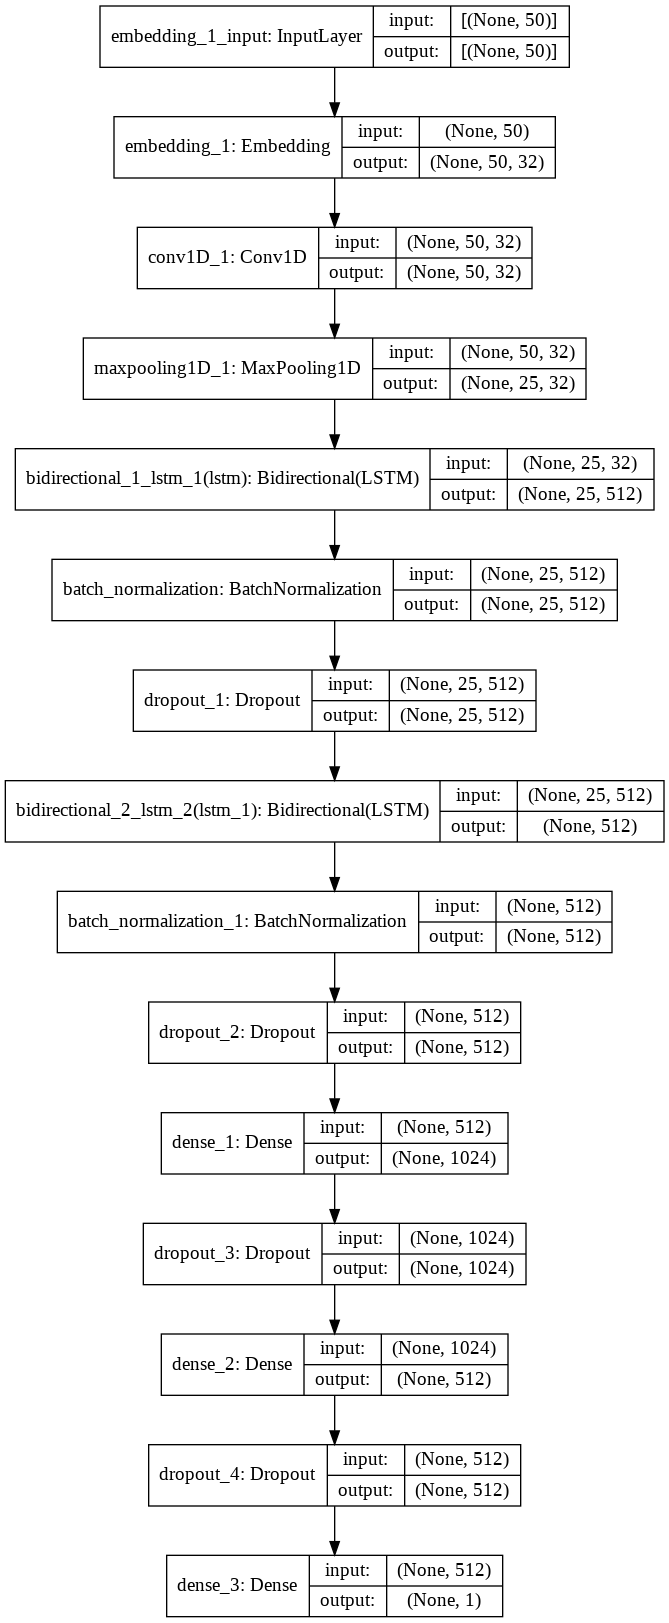

In [20]:
tf.keras.utils.plot_model(my_model,show_shapes=True,show_layer_names=True,to_file="model1.png")

# Tweeking the Hyperparamters like number of epochs and type of optimizers and optimal learning rate

Callback to find the optimum learning rate and then using learning rate decay for better convergence to global mimina

In [21]:
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-08 * 10 **(epoch/5))


**We can see the loss is minimum at the learning rate of 3e-04 so we will use it**

In [22]:
tf.keras.backend.clear_session()
import keras.backend as K
def matthews_correlation(y_true, y_pred):
    y_pred = tf.cast(y_pred,tf.dtypes.float32)
    y_true = tf.cast(y_true,tf.dtypes.float32)
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    numerator = (tp * tn - fp * fn)
    denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    return numerator / (denominator + K.epsilon())

In [23]:
def decay(epoch):
  initial_lr = 1e-04
  decay_rate = 0.1
  lrate = initial_lr * np.exp(-decay_rate*epoch)
  return lrate
lr_schedular = tf.keras.callbacks.LearningRateScheduler(decay)

In [24]:
model = define_model()
model.compile(optimizer = tf.keras.optimizers.Adam(lr=1e-04),
              loss="binary_crossentropy",
              metrics=["acc",matthews_correlation])
batch_size = 64
steps_per_epoch = train_pad_sequence.shape[0]//batch_size
validation_step = test_pad_sequence.shape[0]//batch_size
history = model.fit(train_pad_sequence,train_label,validation_data=(test_pad_sequence,test_label),
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=1,
                    epochs=10,
                    verbose=1,
                    batch_size=batch_size,
                    callbacks=[lr_schedular])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 32)            320000    
_________________________________________________________________
conv1D_1 (Conv1D)            (None, 50, 32)            5152      
_________________________________________________________________
maxpooling1D_1 (MaxPooling1D (None, 25, 32)            0         
_________________________________________________________________
bidirectional_1_lstm_1 (Bidi (None, 25, 512)           591872    
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 512)           2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 512)           0         
_________________________________________________________________
bidirectional_2_lstm_2 (Bidi (None, 512)               1

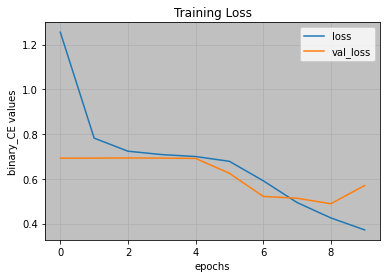

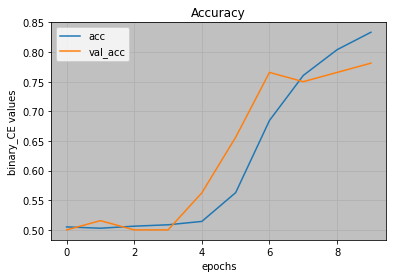

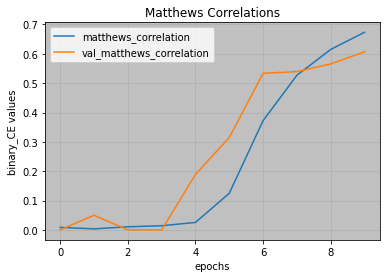

In [35]:
plot_metrics("loss","Training Loss")
plot_metrics("acc","Accuracy")
plot_metrics("matthews_correlation","Matthews Correlations")

Clearly the model is overfitting to avoid overfitting we can use more embedding dimension from 50-80 or to reduce the complexity of the model or using less number of units in LSTM networks.

In [36]:
test_pred = model.predict(test_pad_sequence)

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sb


In [40]:
conf = confusion_matrix(y_true=test_label,y_pred=test_pred.round())


AxesSubplot(0.125,0.125;0.62x0.755)
[[8324  491]
 [4682 3795]]


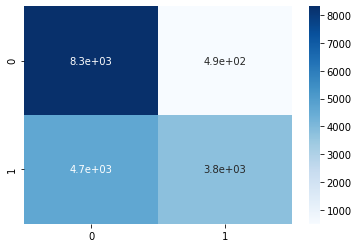

In [42]:
print(sb.heatmap(conf,annot=True,cmap="Blues"))
print(conf)